In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [312]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
#color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
#              CB91_Purple, CB91_Violet]
color_list = ['#e3abe8','#E8ABB0', '#ABE8E3']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)


In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
sns.set(font='Helvetica',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': '#DDEAE3',
 'axes.grid': True,
 #'axes.gridcolor': 'CB91_Green',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.bottom': False,
 'axes.spines.left': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': True,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'inout',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":12,
                                "axes.titlesize":12,
                                "axes.labelsize":12})

In [314]:
Mean_TBill = pd.read_excel('data/Mean_TBILL_Level.xlsx', skiprows=[i for i in range(1,52)])
Mean_Unemp = pd.read_excel('data/Mean_UNEMP_Level.xlsx')
Mean_RGDP_APC = pd.read_excel('data/Mean_RGDP_Growth.xlsx')
Mean_CPI = pd.read_excel('data/Mean_CPI_Level.xlsx')
Mean_CORECPI = pd.read_excel('data/Mean_CORECPI_Level.xlsx')
CSFD_TBill = pd.read_excel('data/Dispersion_TBILL.xlsx', skiprows=8, header=1)
RGDPC1 = pd.read_csv('data/GDPC1.csv')
UNRATE = pd.read_csv('data/UNRATE.csv')
CPI_Urban_All = pd.read_csv('data/CPIAUCSL.csv')
CPI_Urban_LFE = pd.read_csv('data/CPILFESL.csv')

/opt/homebrew/Caskroom/miniforge/base/envs/data310/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [315]:
def remquarter(df): 
    df['QUARTER'] = df['QUARTER'].replace({1: 0, 2: .25, 3: .5, 4: .75})
    df['YEAR'] = df['YEAR'].astype('float64') + df['QUARTER']
    df = df.drop('QUARTER', 1)
    return df

In [316]:
Mean_TBill = remquarter(Mean_TBill)
Mean_RGDP_APC = remquarter(Mean_RGDP_APC)
Mean_Unemp = remquarter(Mean_Unemp)
Mean_CPI = remquarter(Mean_CPI)
Mean_CORECPI = remquarter(Mean_CORECPI)

/var/folders/n_/fszyrnjs51v50gs5tv95wfg00000gn/T/ipykernel_49740/3311805548.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('QUARTER', 1)


In [ ]:
Mean_TBill.rename(columns={"TBILL1": "", "B": "c"})


In [331]:
x = ['2014 Q3', '2014 Q4', '2015 Q1', '2015 Q2', '2015 Q3', '2015 Q4']
y = Mean_TBill.iloc[132:134, 2:7]
comb = {'Quarter': x[:-1], '2014 Q3 Forecasts': y.iloc[0].values}
comb2 = {'Quarter': x[1:], '2014 Q4 Forecasts': y.iloc[1].values} 
xy = pd.DataFrame(data=comb)
xy = xy.set_index(['Quarter'])
xy2 = pd.DataFrame(data=comb2) 
xy2 = xy2.set_index(['Quarter'])
xy = xy.merge(xy2, on='Quarter', how='outer' )



In [328]:
xy

,2014 Q3 Forecasts,2014 Q4 Forecasts
Quarter,,
2014 Q3,0.0498,NaN
2014 Q4,0.0652,0.0452
2015 Q1,0.1069,0.0776
2015 Q2,0.2339,0.1723
2015 Q3,0.4515,0.3721
2015 Q4,NaN,0.6209


In [332]:
xy['Actual Rate'] = Mean_TBill.iloc[133:139, 1:2].values

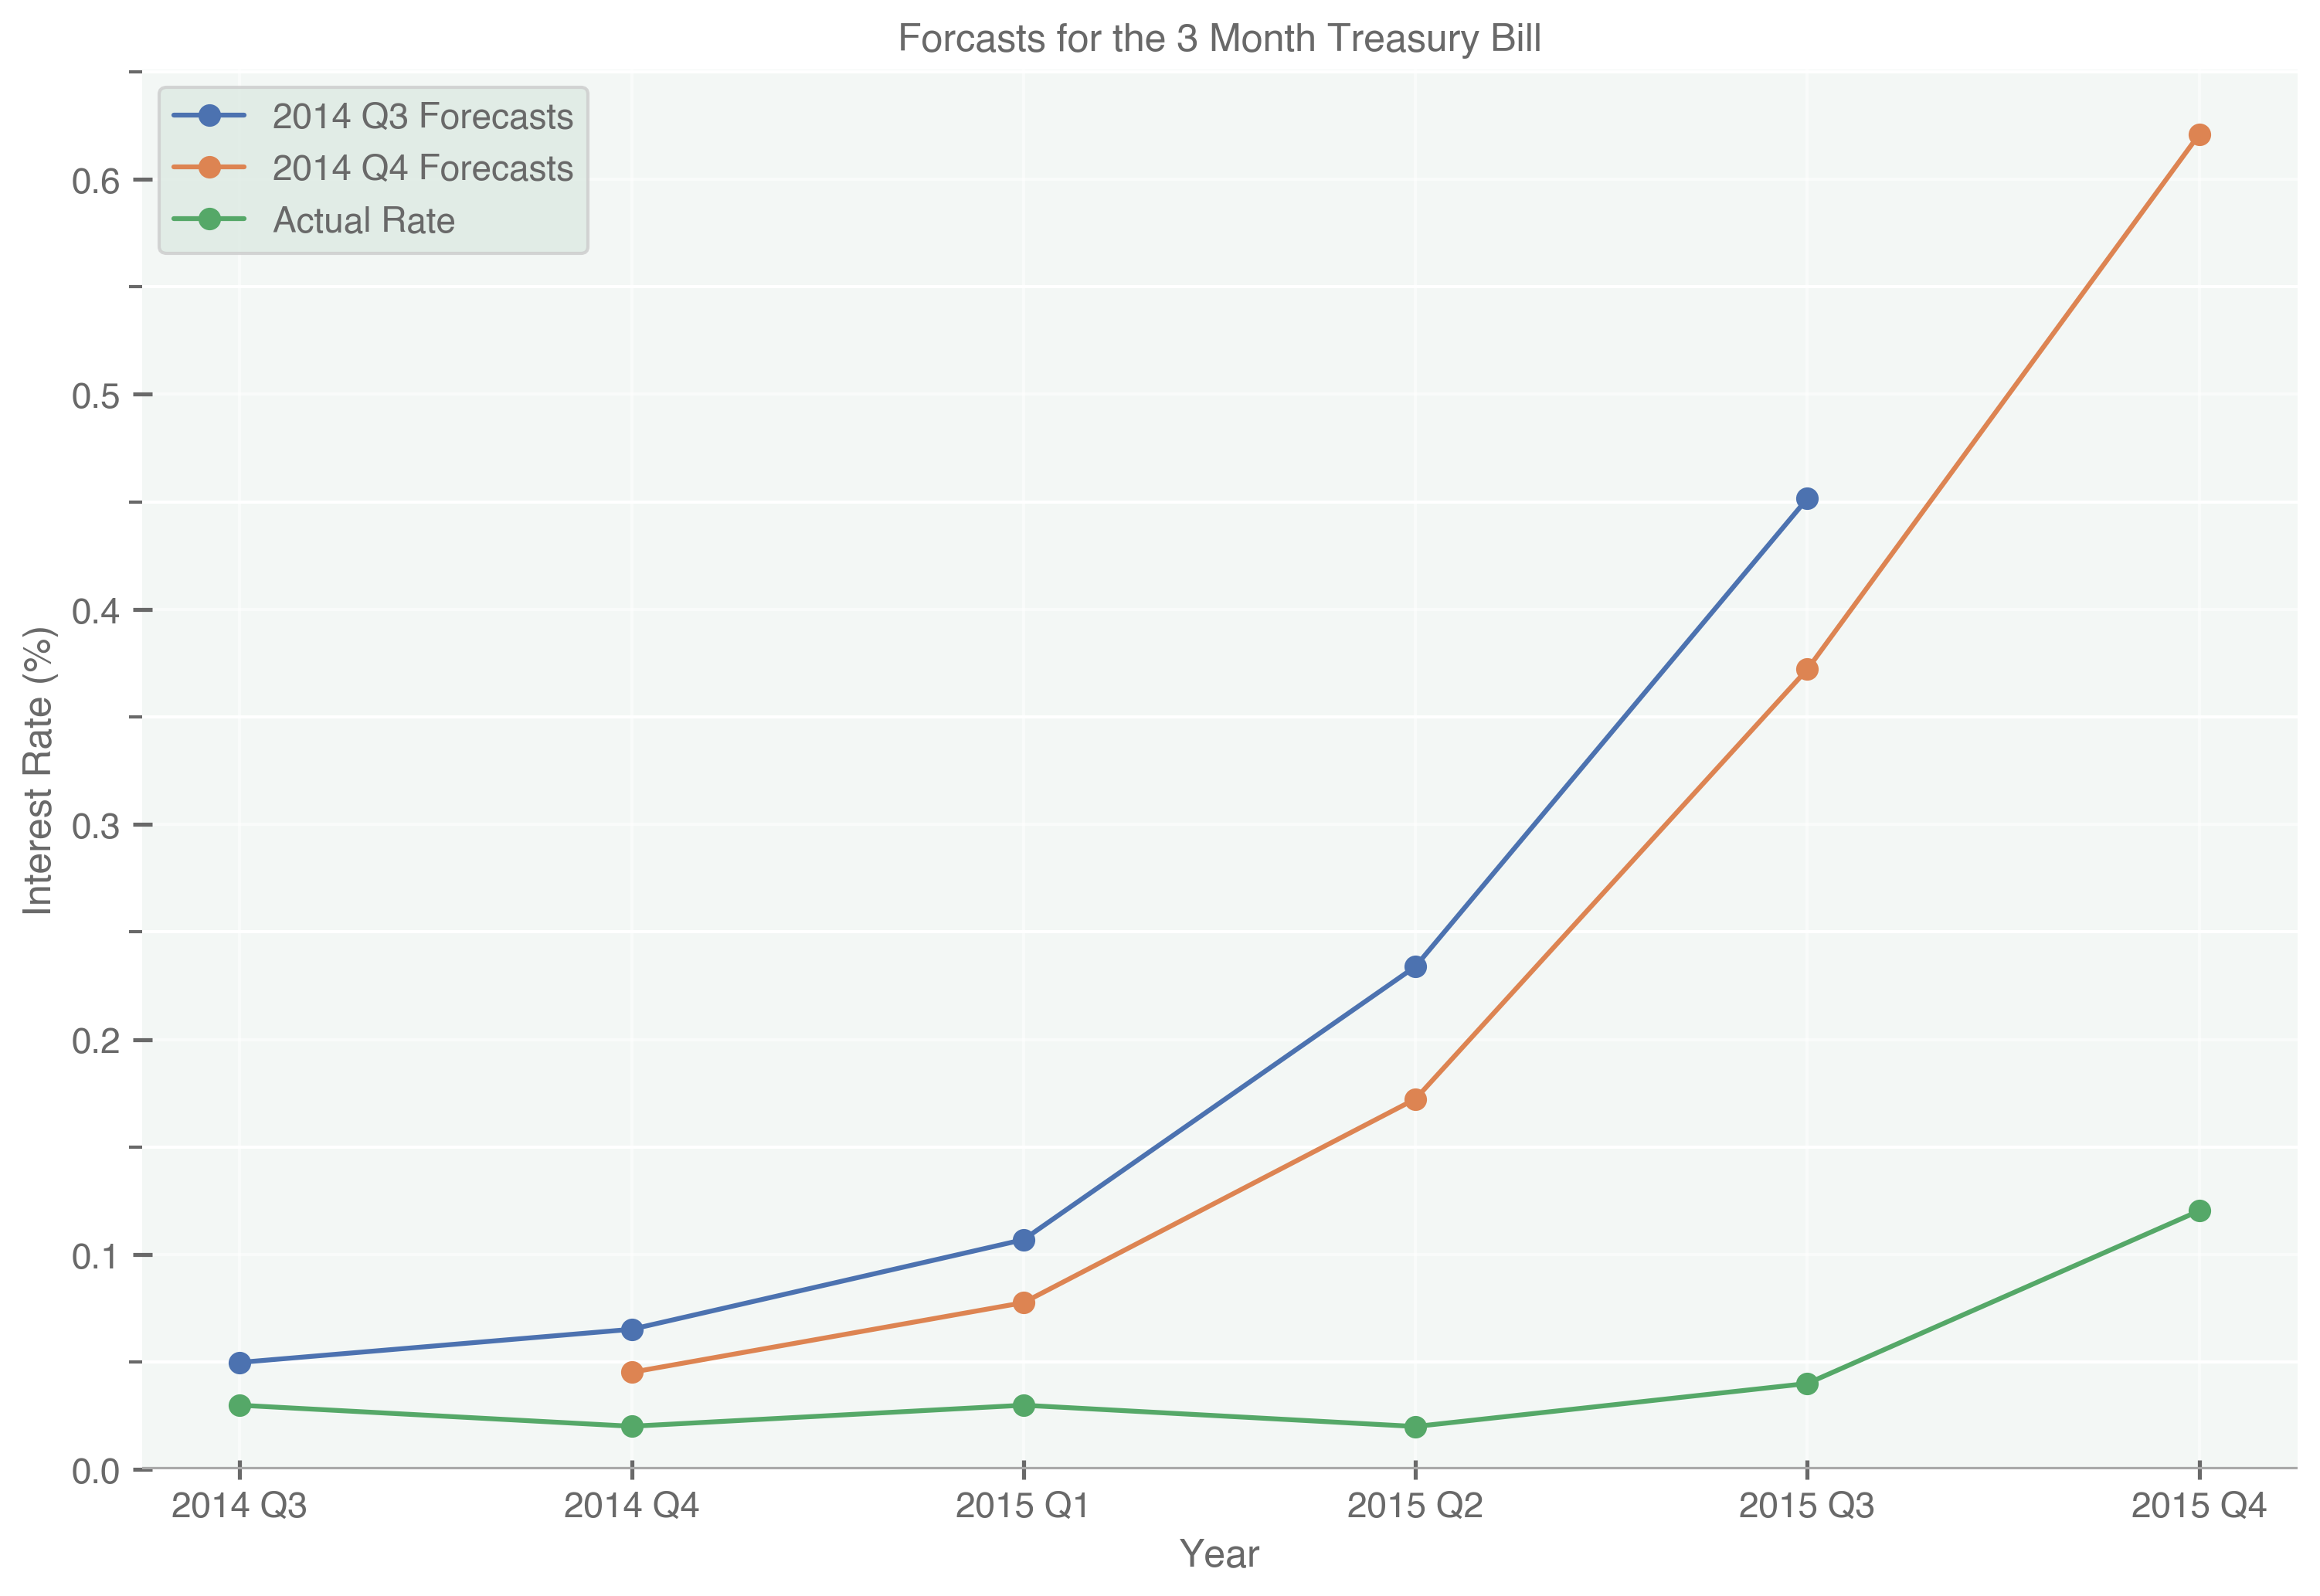

In [333]:
xig, ax = plt.subplots(figsize=(12,8), dpi=300)
import matplotlib.dates as mdates
#y2 = 
ax.patch.set_alpha(.35)
ax.plot(xy, alpha=1, marker = 'o')
ax.set_axisbelow(True)

#ax.set_xticks(ax.get_yticks()[::20])
ax.tick_params(axis='both', direction='inout', length=6, grid_alpha=.5)
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_major_formatter('{x:.0f}')
# ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(.1))
#ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(.05))
ax.grid(which='minor', linewidth=1)
# ax.set_xlim(*mdates.datestr2num(['1/01/1994', '6/01/2021']))
#ax.axhline(0, color='darkgrey')
ax.axhline(0, color='darkgrey')
ax.set_ylim(0)
ax.set(title='Forcasts for the 3 Month Treasury Bill',
ylabel='Interest Rate (%)',
xlabel='Year')
ax.legend(xy.columns.values,loc='upper left', frameon=True)
# plt.show()

In [126]:
xy

,2014 Q3 Forecasts,2014 Q4 Forecasts
Quarter,,
2014 Q3,0.0498,NaN
2014 Q4,0.0652,0.0452
2015 Q1,0.1069,0.0776
2015 Q2,0.2339,0.1723
2015 Q3,0.4515,0.3721
2015 Q4,NaN,0.6209


In [100]:
xy2

,2014Q4
Quarter,
2014 Q4,0.0452
2015 Q1,0.0776
2015 Q2,0.1723
2015 Q3,0.3721
2015 Q4,0.6209


In [320]:
def ready(df, x, str): 
    if x == 1: 
        df = df.iloc[:, :7]
        df.columns=['YEAR', '2014 Q2', '2014 Q3', '2014 Q4', '2015 Q1', '2015 Q2', '2015 Q3']
        df = df.drop('2014 Q2', 1)
    if x == 2: 
        df = df.iloc[:, :6]
        df.columns = ['YEAR', '2014 Q3', '2014 Q4', '2015 Q1', '2015 Q2', '2015 Q3']
    df = df.loc[df['YEAR'] == 2014.5].T
    df.columns = [str]
    df = df.drop(df.index[0])
    return df


In [321]:
Error_Pre = ready(Mean_Unemp, 1, 'Unemployment')
Error_Pre['Unemployment'] = (Error_Pre['Unemployment'].values - Mean_Unemp.iloc[184:189, 1:2].values)
Error_Pre['CPI'] = (ready(Mean_CPI, 1, 'CPI_M').values - Mean_CPI.iloc[184:189, 1:2].values)
#Error_Pre['CPI_Actual'] = Mean_CPI.iloc[184:189, 1:2].values
Error_Pre['CORECPI'] = (ready(Mean_CORECPI, 1, 'CORECPI_m').values - Mean_CORECPI.iloc[184:189, 1:2].values)
Error_Pre['RGDP'] = (ready(Mean_RGDP_APC, 0, 'RGDP_m').values - Mean_RGDP_APC.iloc[183:188, 1:2].values)

/var/folders/n_/fszyrnjs51v50gs5tv95wfg00000gn/T/ipykernel_49740/635569462.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('2014 Q2', 1)


In [267]:
Error_Pre.set_index(['YEAR'])

KeyError: "None of ['YEAR'] are in the columns"

In [268]:
Error_Pre

,Unemployment,CPI,CORECPI,RGDP
2014 Q3,-0.0185,-1.0255,-0.7607,0.0000
2014 Q4,-0.4170,-3.1824,-0.6758,-0.3147
2015 Q1,-0.5186,-5.1564,-0.3933,-0.3369
2015 Q2,-0.7170,0.8763,0.3507,-0.5125
2015 Q3,-0.9178,-0.4876,-0.4023,-0.1139


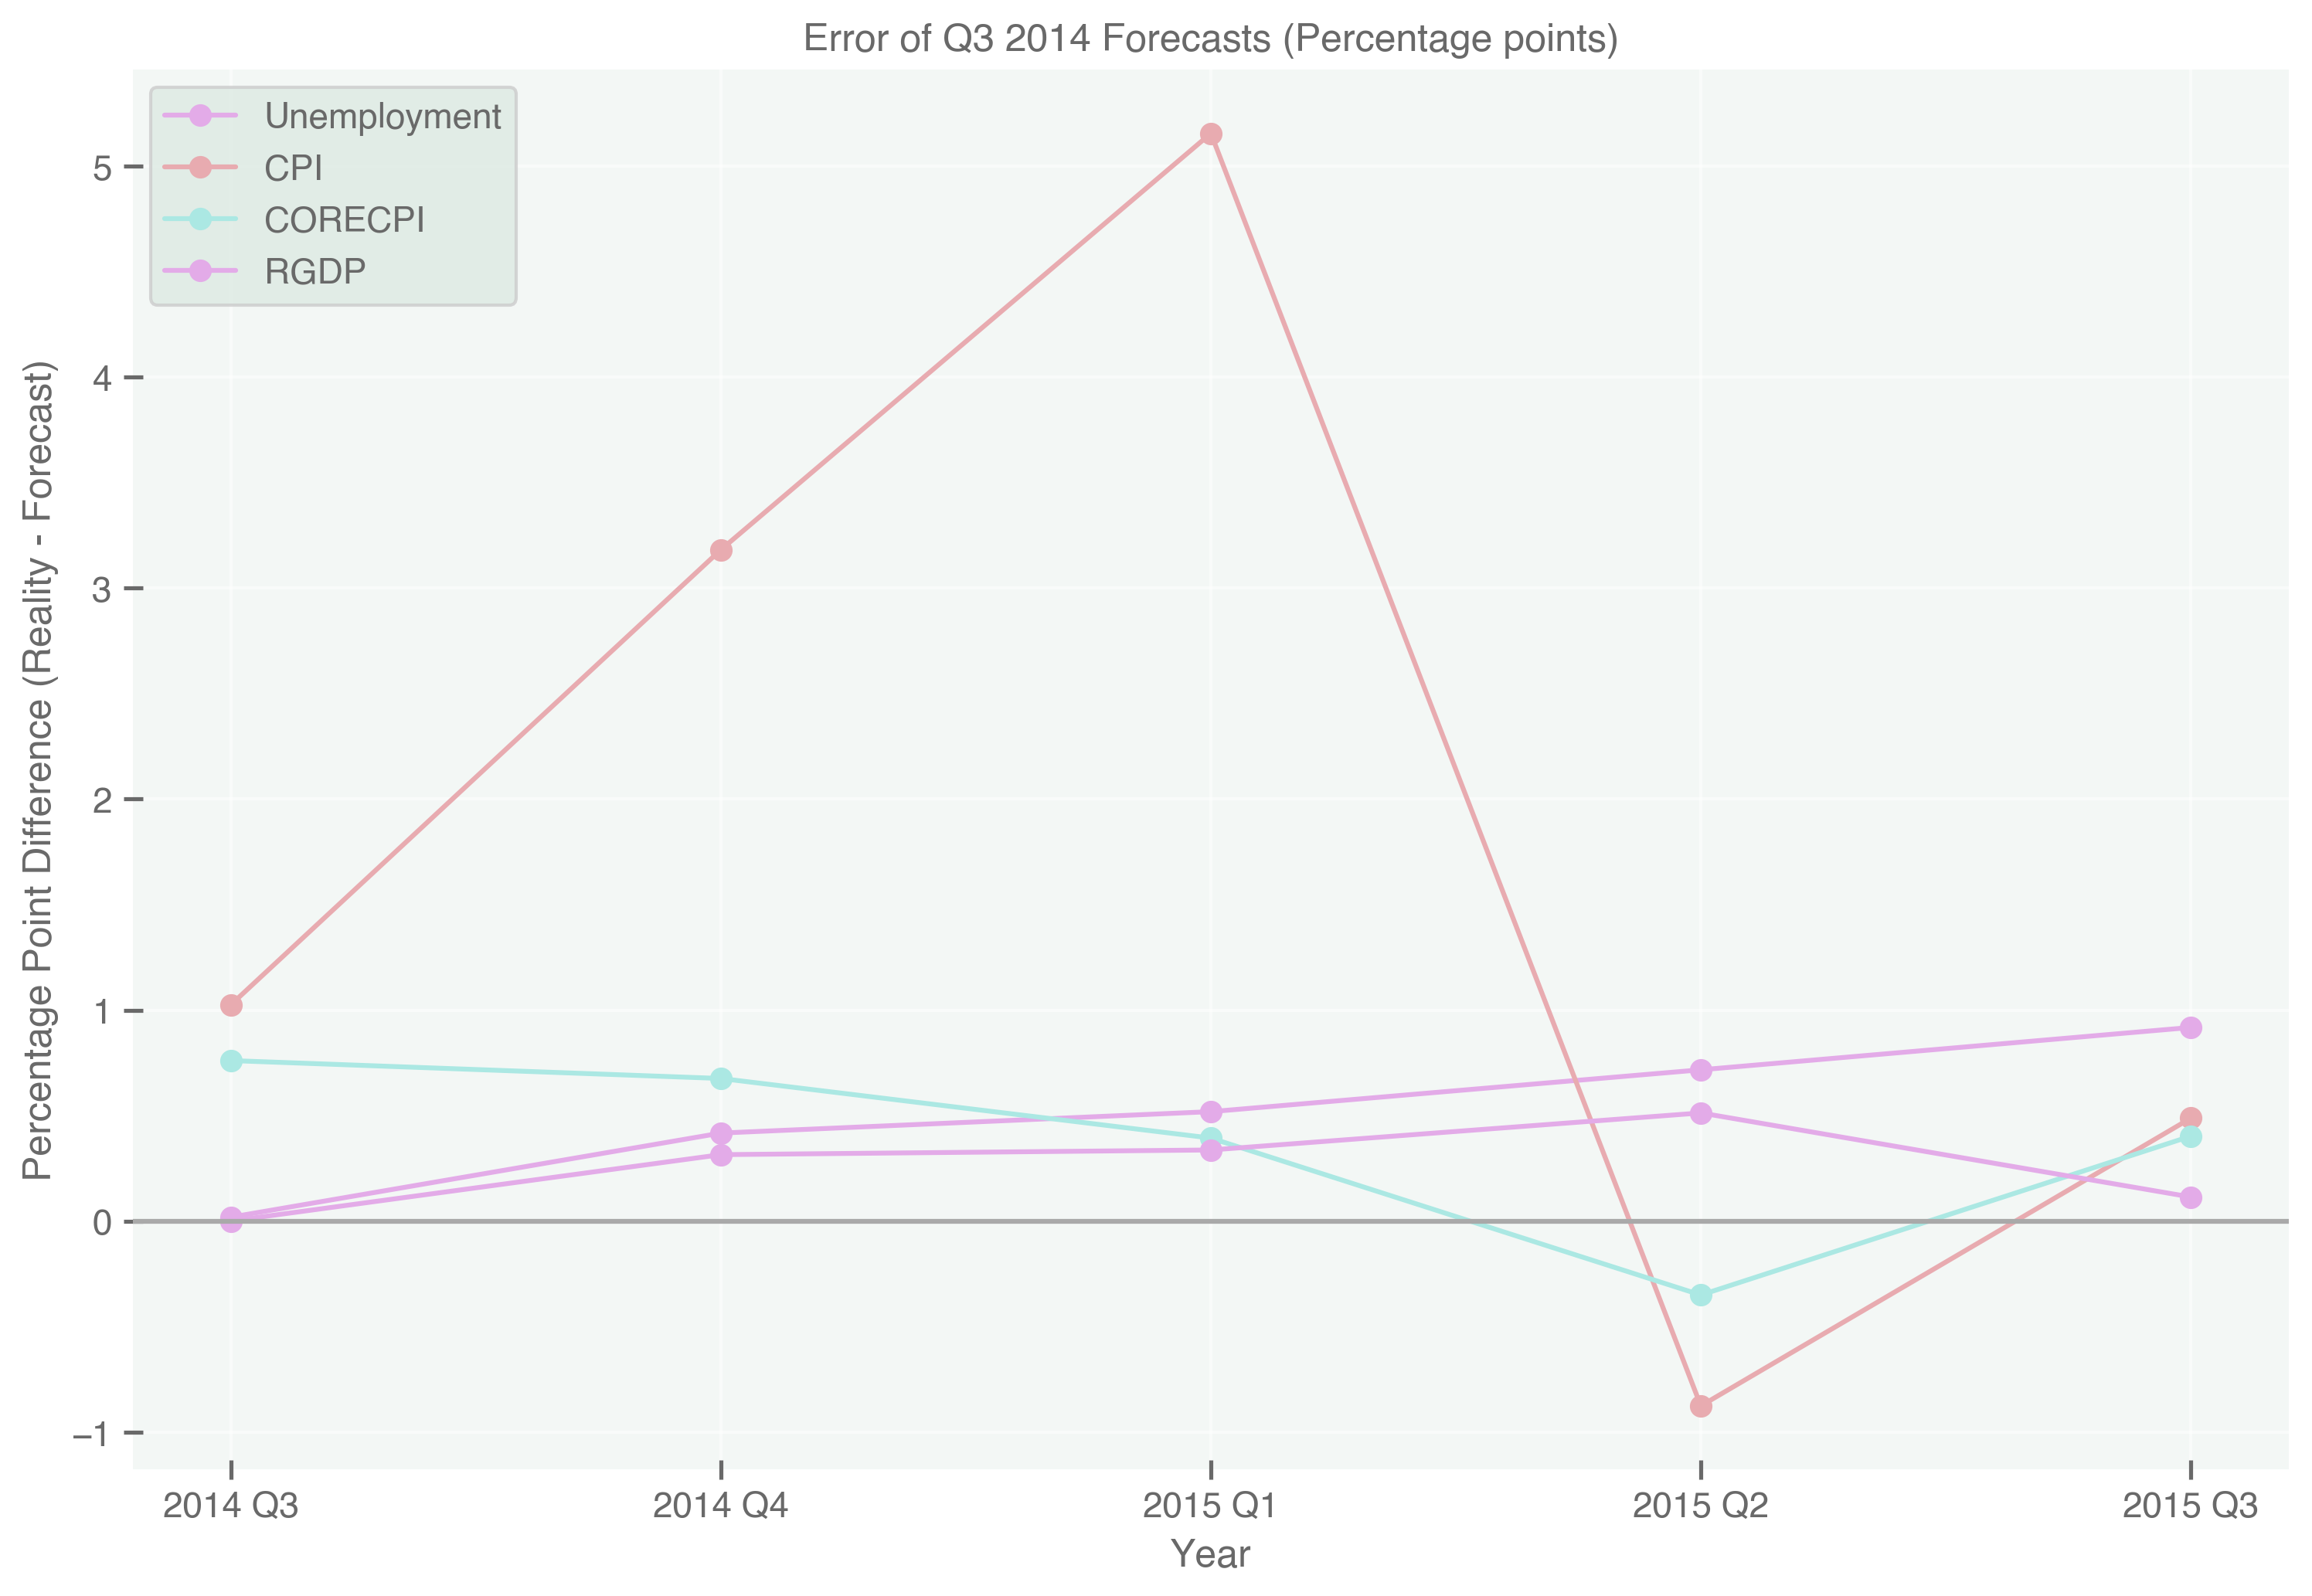

In [282]:
xig, ax = plt.subplots(figsize=(12,8), dpi=300)

ax.patch.set_alpha(.35)
ax.plot(Error_Pre['Unemployment'], alpha=1, marker = 'o')
ax.plot(Error_Pre['CPI'], alpha=1, marker = 'o')
ax.plot(Error_Pre['CORECPI'], alpha=1, marker = 'o')
ax.plot(Error_Pre['RGDP'], alpha=1, marker = 'o')
ax.set_axisbelow(True)

#ax.set_xticks(ax.get_yticks()[::20])
ax.tick_params(axis='both', direction='inout', length=6, grid_alpha=.5)
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_major_formatter('{x:.0f}')
# ax.xaxis.set_minor_locator(MultipleLocator(5))
##ax.yaxis.set_major_locator(MultipleLocator(.1))
#ax.yaxis.set_major_formatter('{x:.0f}')
##ax.yaxis.set_minor_locator(MultipleLocator(.05))
ax.grid(which='minor', linewidth=1)
# ax.set_xlim(*mdates.datestr2num(['1/01/1994', '6/01/2021']))
#ax.axhline(0, color='darkgrey')
#ax.set_ylim(0)
ax.set(title='Error of Q3 2014 Forecasts (Percentage points)',
ylabel='Percentage Point Difference (Forecast - Reality)',
xlabel='Year')
ax.legend(Error_Pre.columns.values,loc='upper left', frameon=True)
ax.axhline(0, color='darkgrey')
plt.show()

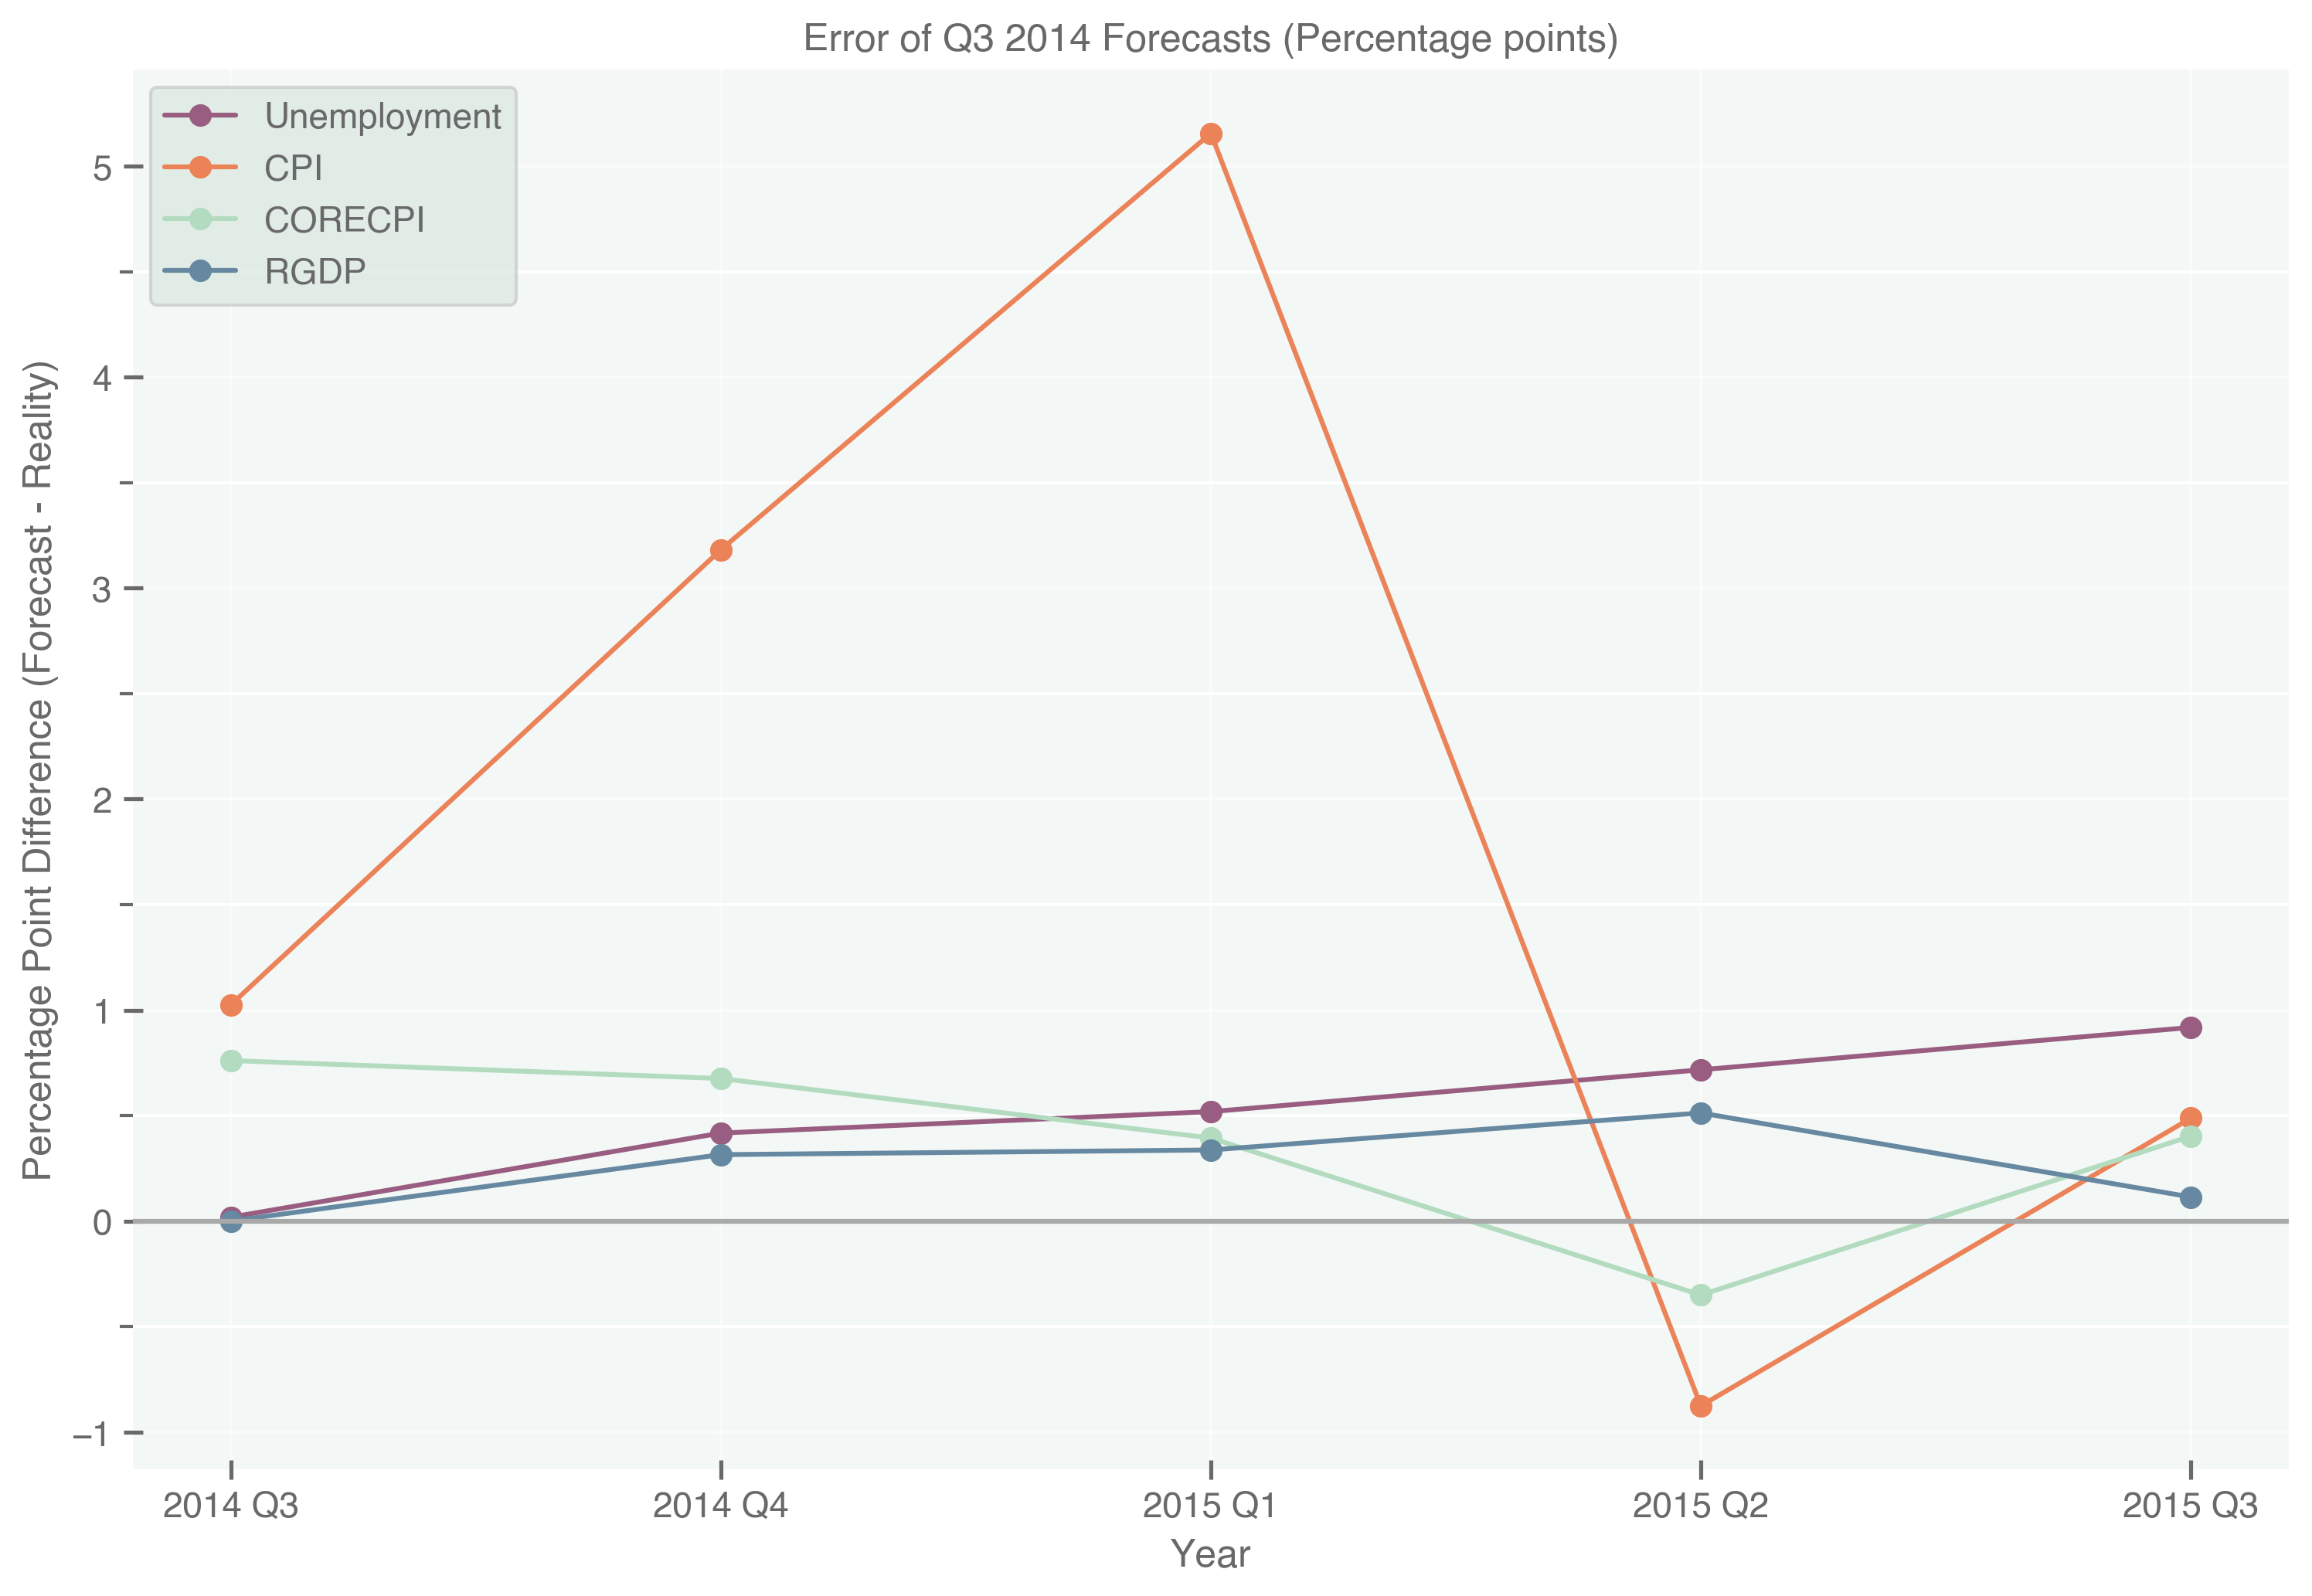

In [310]:
xig, ax = plt.subplots(figsize=(12,8), dpi=300)

ax.patch.set_alpha(.35)
ax.plot(Error_Pre['Unemployment'], alpha=1, marker = 'o', color = '#995D81',)
ax.plot(Error_Pre['CPI'], alpha=1, marker = 'o', color = '#EB8258')
ax.plot(Error_Pre['CORECPI'], alpha=1, marker = 'o', color = '#B2DBBF')
ax.plot(Error_Pre['RGDP'], alpha=1, marker = 'o', color = '#6689A1')
ax.set_axisbelow(True)

#ax.set_xticks(ax.get_yticks()[::20])
ax.tick_params(axis='both', direction='inout', length=6, grid_alpha=.5)
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_major_formatter('{x:.0f}')
# ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(1))
#ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(.5))
ax.grid(which='minor', linewidth=1)
# ax.set_xlim(*mdates.datestr2num(['1/01/1994', '6/01/2021']))
#ax.axhline(0, color='darkgrey')
#ax.set_ylim(0)
ax.set(title='Error of Q3 2014 Forecasts (Percentage points)',
ylabel='Percentage Point Difference (Forecast - Reality)',
xlabel='Year')
ax.legend(Error_Pre.columns.values,loc='upper left', frameon=True)
ax.axhline(0, color='darkgrey')
plt.show()

In [309]:
Error_Pre.to_csv('data/table.csv')

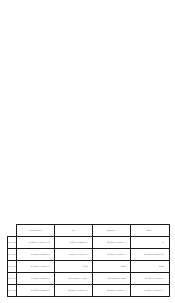

In [303]:
from pandas.plotting import table 

ax = plt.subplot(121, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, Error_Pre)  # where df is your data frame


In [305]:
import dataframe_image as dfi
df_styled = Error_Pre.style.background_gradient() #adding a gradient based on values in cell



In [307]:
dfi.export(df_styled,"mytable.png")


[1014/203808.285384:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/n_/fszyrnjs51v50gs5tv95wfg00000gn/T/: Operation not permitted (1)
[1014/203808.286353:ERROR:file_io.cc(91)] ReadExactly: expected 8, observed 0
[1014/203808.287585:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/n_/fszyrnjs51v50gs5tv95wfg00000gn/T/: Operation not permitted (1)
[1014/203808.712244:INFO:headless_shell.cc(653)] Written to file /var/folders/n_/fszyrnjs51v50gs5tv95wfg00000gn/T/tmptvgdtlak/temp.png.
